# Potato Store vs Potato Fresh
___
Easyfresh Technologies

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

Reading the input data

In [ ]:
# NAME_OF_FILE = "amis_2007-2022.xlsx"
# NAME_OF_SHEET = "isb-prices"
# NAME_OF_DATE_COLUMN = "date"
# NAME_OF_PRICE_COLUMN = ""

In [7]:
filename = "amis_2007-2022.xlsx"
sheetname = "isb-prices"
df = pd.read_excel(filename, sheet_name=sheetname)
df.head()

,date,potato-fresh,potato-store,tomato,onion
0,2007-05-01,NaN,NaN,NaN,NaN
1,2007-05-02,NaN,NaN,NaN,NaN
2,2007-05-03,NaN,NaN,NaN,NaN
3,2007-05-04,NaN,NaN,NaN,NaN
4,2007-05-05,NaN,NaN,NaN,NaN


Adding different fields into the data

In [8]:
df['dayofyear'] = df['date'].apply(lambda x: x.day_of_year)
df['dayofweek'] = df['date'].apply(lambda x: x.day_of_week)
df['dayofmonth'] = df['date'].apply(lambda x: x.day)
df['month'] = df['date'].apply(lambda x: x.month)
df.head(7)

,date,potato-fresh,potato-store,tomato,onion,dayofyear,dayofweek,dayofmonth,month
0,2007-05-01,NaN,NaN,NaN,NaN,121,1,1,5
1,2007-05-02,NaN,NaN,NaN,NaN,122,2,2,5
2,2007-05-03,NaN,NaN,NaN,NaN,123,3,3,5
3,2007-05-04,NaN,NaN,NaN,NaN,124,4,4,5
4,2007-05-05,NaN,NaN,NaN,NaN,125,5,5,5
5,2007-05-06,NaN,NaN,NaN,NaN,126,6,6,5
6,2007-05-07,NaN,NaN,NaN,NaN,127,0,7,5


Dropping onion and tomato to analyze potatoes only

In [25]:
df_pot = df.drop(columns = ['onion','tomato'])
df_pot.head()

,date,potato-fresh,potato-store,dayofyear,dayofweek,dayofmonth,month
0,2007-05-01,NaN,NaN,121,1,1,5
1,2007-05-02,NaN,NaN,122,2,2,5
2,2007-05-03,NaN,NaN,123,3,3,5
3,2007-05-04,NaN,NaN,124,4,4,5
4,2007-05-05,NaN,NaN,125,5,5,5


In [26]:
df_pot.describe()

,potato-fresh,potato-store,dayofyear,dayofweek,dayofmonth,month
count,4436.000000,2261.000000,5724.000000,5724.000000,5724.000000,5724.000000
mean,27.009175,22.074551,185.696017,3.000000,15.733927,6.607268
std,13.357479,11.201676,104.906115,1.999738,8.802945,3.431034
min,6.000000,5.000000,1.000000,0.000000,1.000000,1.000000
25%,16.000000,15.000000,96.000000,1.000000,8.000000,4.000000
50%,25.000000,19.000000,187.000000,3.000000,16.000000,7.000000
75%,33.000000,25.500000,276.000000,5.000000,23.000000,10.000000
max,78.000000,68.000000,366.000000,6.000000,31.000000,12.000000


### -> What times are Potato Fresh and Potato Store sold throughout the year?

Preparing data for charts

In [5]:
df_pot_s = df_pot[['month','potato-store']].dropna(axis=0)
df_pot_f = df_pot[['month','potato-fresh']].dropna(axis=0)
df_pot_f.head()

,month,potato-fresh
8,5,8.63
15,5,8.75
16,5,8.75
17,5,8.75
18,5,8.63


Creating charts where x-axis = Month Number and y-axis is Number of Times prices are given in each month
For example: For Potato Store (left), in the 6th Month (June), in 2007 to 2022, there are around 300 to 350 days where prices are present. 

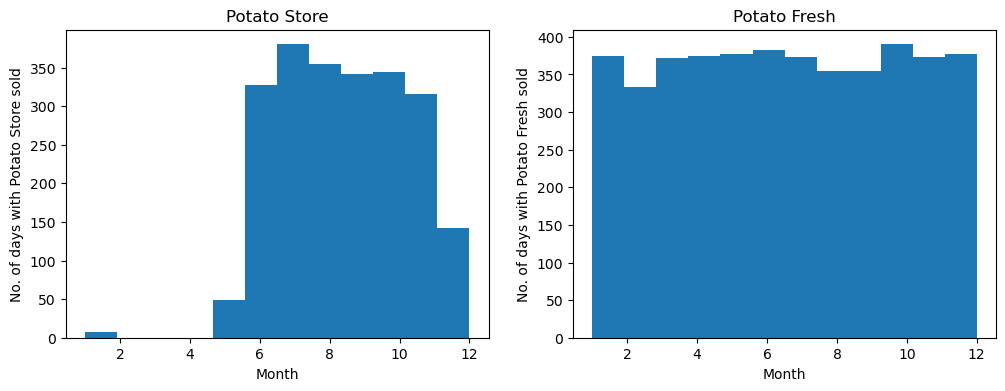

In [43]:
plt.figure(figsize=(12,4))

plt.subplot(121)
plt.hist(df_pot_s['month'], bins=12)
plt.xlabel('Month')
plt.ylabel('No. of days with Potato Store sold')
plt.title('Potato Store')

plt.subplot(122)
plt.hist(df_pot_f['month'], bins=12)
plt.xlabel('Month')
plt.ylabel('No. of days with Potato Fresh sold')
plt.title('Potato Fresh')
plt.show()


### Prices of Potato Store vs Potato Fresh

In [10]:
df_pot.head()

,date,potato-fresh,potato-store,dayofyear,dayofweek,dayofmonth,month
0,2007-05-01,NaN,NaN,121,1,1,5
1,2007-05-02,NaN,NaN,122,2,2,5
2,2007-05-03,NaN,NaN,123,3,3,5
3,2007-05-04,NaN,NaN,124,4,4,5
4,2007-05-05,NaN,NaN,125,5,5,5


In [23]:
df_pot[['potato-fresh', 'potato-store']].describe().reset_index()

,index,potato-fresh,potato-store
0,count,4436.000000,2261.000000
1,mean,27.009175,22.074551
2,std,13.357479,11.201676
3,min,6.000000,5.000000
4,25%,16.000000,15.000000
5,50%,25.000000,19.000000
6,75%,33.000000,25.500000
7,max,78.000000,68.000000


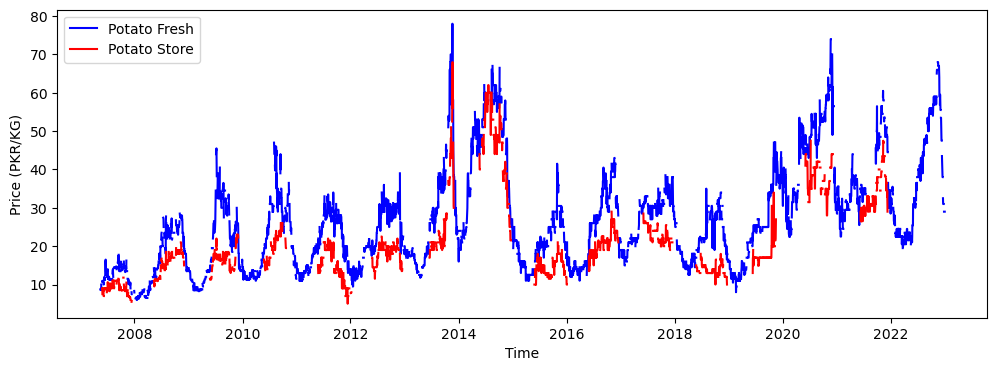

In [39]:
plt.figure(figsize=(12,4))

plt.plot(df_pot['date'], df_pot['potato-fresh'], 'b', label="Potato Fresh")
plt.plot(df_pot['date'], df_pot['potato-store'], 'r', label="Potato Store")
plt.xlabel('Time')
plt.ylabel('Price (PKR/KG)')
plt.legend()


In [40]:
df_pot.corr()

,potato-fresh,potato-store,dayofyear,dayofweek,dayofmonth,month
potato-fresh,1.000000,0.916831,0.453754,0.007270,-0.021139,0.456891
potato-store,0.916831,1.000000,0.081222,0.018641,-0.004043,0.080691
dayofyear,0.453754,0.081222,1.000000,-0.001314,0.093926,0.996463
dayofweek,0.007270,0.018641,-0.001314,1.000000,0.000010,-0.001324
dayofmonth,-0.021139,-0.004043,0.093926,0.000010,1.000000,0.010222
month,0.456891,0.080691,0.996463,-0.001324,0.010222,1.000000


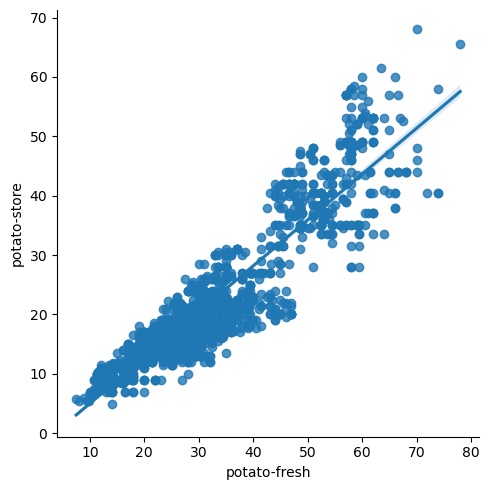

In [41]:
sns.lmplot(x='potato-fresh', y='potato-store', data=df_pot)